In [1]:
import sys
sys.path.append('../scripts/')
from puddle_world import *
import itertools
%matplotlib widget

In [2]:
class PolicyEvaluator:
    def __init__(self, widths, goal, lowerleft=np.array([-4, -4]).T, upperright=np.array([4, 4]).T):
        self.pose_min = np.r_[lowerleft, 0]
        self.pose_max = np.r_[upperright, math.pi*2]
        self.widths = widths
        self.goal = goal

        self.index_nums = ((self.pose_max - self.pose_min) /
                           self.widths).astype(int)
        nx, ny, nt = self.index_nums
        self.indexes = list(itertools.product(range(nx), range(ny), range(nt)))

        self.value_function, self.final_state_flags = self.init_value_function()
        self.policy = self.init_policy()

    def init_policy(self):
        tmp = np.zeros(np.r_[self.index_nums, 2])
        for index in self.indexes:
            center = self.pose_min + self.widths * \
                (np.array(index).T + 0.5)
            tmp[index] = PuddleIgnoreAgent.policy(center, self.goal)

        return tmp

    def init_value_function(self):
        v = np.empty(self.index_nums)
        f = np.zeros(self.index_nums)

        for index in self.indexes:
            f[index] = self.final_state(np.array(index).T)
            v[index] = self.goal.value if f[index] else -100.0

        return v, f

    def final_state(self, index):
        x_min, y_min, _ = self.pose_min + self.widths*index
        x_max, y_max, _ = self.pose_min + self.widths * \
            (index + 1)

        corners = [[x_min, y_min, _], [x_min, y_max, _], [
            x_max, y_min, _], [x_max, y_max, _]]
        return all([self.goal.inside(np.array(c).T) for c in corners])

In [3]:
import seaborn as sns

pe = PolicyEvaluator(np.array([0.2, 0.2, math.pi/18]).T, Goal(-3, -3)) 

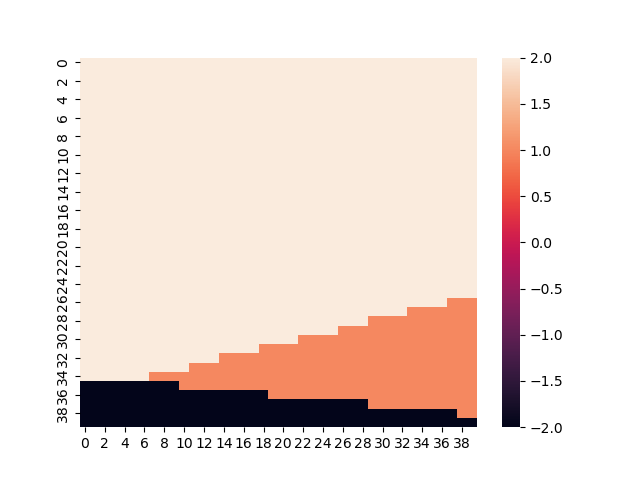

In [4]:
p = np.zeros(pe.index_nums)
for i in pe.indexes:
    p[i] = sum(pe.policy[i])

sns.heatmap(np.rot90(p[:, :, 18]), square=False)  # 180〜190[deg]の向きのときの行動を図示
plt.show()